# <font color='blue'><div style="text-align: center">Ch 5.Spam Filter 만들기</font> 
    
* 스팸메일의 유래: 2차 세계대전 때, 미국이 영국에 원조물자로 스팸을 공급했는데 매일 스팸만 먹어서 영국인은 스팸을 쳐다보기도 싫어하게 된것이 유래가 되어 쳐다보기도 싫은 메일이란 뜻으로 사용됨

* 스팸필터란 네이버, 구글 메일 서비스에서 스팸 메일이 도착하면 자동으로 스팸메일함으로 이동시키는 서비스임
* 가장 쉬운 스팸필터는 특정 단어 혹은 특정 발신자의 메일을 스팸 메일함으로 이동하는 방법인데
   예를 들어, "대리운전", "대리", "운전" 이 포함된 메일이나 abc@email.com으로 온 메일을  스팸 메일함으로 이동하는 방법임
* 지금 여러 메일서비스에는 이보다 지능적인 방법이 탑재되어 있음

* 우리는 나이브 베이즈라는 이론을 이용하여 스팸분류를 할 것임
<br>

## 5.1 조건부 확률
<br>
* 일반적으로 spam 메일이 올 확률이 작다.

![bayes1](https://drive.google.com/uc?id=1m9abcU24AkC2Pm7j-LrqMDSXwryecg0Q)

<br>
* 메일에 '비아그라'  라는 단어가 포함된 메일이라면 스팸메일일 확률이 높을 것이다.

![bayes2](https://drive.google.com/uc?id=1txgcF_hhyYg5xQe258hHV9OFydOhA6U8)

<br>
* 사건 B 가 일어날을 때, 사건 A가 일어날 확률

![bayes3](https://drive.google.com/uc?id=1J5GTKdYpro78k92rGCRE739i00TYKoE7)

<br>
* '비아그라' 라는 단어가 포함된 메일이 수신되면 스팸이 확률이 80%이다.

![bayes4](https://drive.google.com/uc?id=1loEHTa8C5-VR9mY5hVCRbyqDhhrpUQq5)
    
## 5.2 베이즈 정리의 의미
    
* 사전정보(Prior Information)를 활용하면 다음 의사결정의 정확도를 높일 수 있다. 
* 우리의 뇌 신경계(Neuron)는 불확실성의 세계에서 주어진 정보를 토대로 최적에 가까운 의사결정을 내리게 진화해
왔다. 즉, 우리가 이전에 알고 있던 정보(prior)에 새로 습득한 정보(likelihood)를 조합해 이를 바탕으로
사후 확률(posterior)을 예측해 결정을 내린다.
    
* 위에서 만들어진 사후 확률은 이전 정보가 되고 여기에 또 다른 정보가 추가되면 사후 확률도 업데이트된다.
* 우리가 주변 세상의 변화에 적응해 살아갈 수 있는 건 뇌가 끊임없이 들어오는 정보를 베이즈 정리의 방식으로
반영하면서 자신을 업데이트하기 때문이라는 말이다.
* Bayes Theorem은 의사결정에서 주어진 Data 외에 우리가 이전에 알고 있던 사전지식을 적절히 활용하여
의사결정하는 방법론(Bayesian Approach)으로 발전하여 스팸분류기, 문자, 음성 인식 등 학습형 알고리듬을
만드는데 활용되고 있다.     


## 5.3 나이브 베이즈 알고리즘

* 나이브 베이즈는 조건부 확률을 이용하여 특정 단어들이 관측되었을 때, Spam일 확률을 계산해 놓고  <br>
  메일이 도착했을 때,특정 단어의 포함여부를 계산하여 스팸 확률을 추정하는 알고리즘이다.

* 문서에서 단어가 나타날 확률이 서로 독립이 아니다.  즉, "사랑" 과 "행복"은 동시에 나올 수 있는 가능성이 높은 단어이기 때문에
   $ P("love" \cap "happy") = P("love") \cdot P("happy") $ 가 아니다. 즉, 서로 독립이 아니라는 뜻이다.
* 하지만, 수많은 단어의 조합에 대해 확률을 추정하는 것은 어려운 일이다.
* 어렵기 때문에 위의 독립이 아닌것을 독립이라고 가정하고 계산하자라는 아이디어가 나이브베이즈 알고리즘이다.   
  
<br>

![bayes5](https://drive.google.com/uc?id=1G7o6Eynee59cfdQ10zDfjj8dno_EUP2Y)
<br>

* 나이브(순진)하게 단어들끼리 서로 독립이라고 가정하면 ...

![bayes6](https://drive.google.com/uc?id=1LpqcXKqxWBi2vWxXLAmtd5artEsICJgi)


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!more /gdrive/My\ Drive/ML/data/sms_spam.csv

﻿ham,Hope you are having a good week. Just checking in
ham,K..give back my thanks.
ham,Am also doing in cbe only. But have to pay.
spam,"complimentary 4 STAR Ibiza Holiday or ￡10,000 cash needs your URGENT coll
ection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+"
spam,okmail: Dear Dave this is your final notice to collect your 4* Tenerife Hol
iday or #5000 CASH award! Call 09061743806 from landline. TCs SAE Box326 CW25WX 
150ppm
ham,Aiya we discuss later lar... Pick u up at 4 is it?
ham,Are you this much buzy
ham,Please ask mummy to call father
spam,Marvel Mobile Play the official Ultimate Spider-man game (￡4.50) on ur mob
ile right now. Text SPIDER to 83338 for the game & we ll send u a FREE 8Ball wal
lpaper
ham,"fyi I'm at usf now, swing by the room whenever"
ham,"Sure thing big man. i have hockey elections at 6, shouldn€?t go on longer t
han an hour though"
ham,I anything lor...
ham,"By march ending, i should be ready. But will call you for sure. The problem

In [ ]:
'Hope you are having a good week. Just checking in'.split()

['Hope',
 'you',
 'are',
 'having',
 'a',
 'good',
 'week.',
 'Just',
 'checking',
 'in']

In [ ]:
import numpy as np
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import csv

# 파일에는 총 5559개의 메일이 있고 이중에는 ham, spam 메일이 섞여 있다.
f = open('/gdrive/My Drive/ML/data/sms_spam.csv', 'r')
rdr = csv.reader(f)
nData = 0
all_words =[]

for line in rdr:
    words = line[1].split()
    all_words += words
    nData += 1
f.close()   

print(nData)

5559


In [ ]:
# dictionary에는 가장 많은 빈도를 가진 단어 순으로 단어와 빈도를 저장하였다.
dictionary = Counter(all_words)
print(dictionary)
print(len(dictionary))

Counter({'to': 2137, 'you': 1615, 'I': 1464, 'a': 1333, 'the': 1200, 'u': 854, 'and': 852, 'in': 799, 'is': 788, 'i': 748, 'for': 649, 'my': 627, 'of': 591, 'me': 560, 'your': 543, 'on': 486, 'have': 476, '2': 455, 'that': 418, 'are': 397, 'it': 395, 'call': 376, 'or': 373, 'be': 361, 'at': 360, 'with': 351, 'not': 344, 'will': 330, 'get': 325, 'can': 304, 'U': 301, 'ur': 296, 'so': 295, "I'm": 285, 'but': 284, '#': 279, 'You': 265, 'from': 256, '4': 254, 'up': 242, '.': 242, 'do': 241, 'if': 239, 'just': 238, 'go': 237, 'when': 234, 'like': 224, 'know': 224, 'this': 222, 'we': 222, 'all': 217, 'out': 209, 'got': 204, 'was': 200, 'come': 199, '&': 194, 'now': 190, 'am': 186, '?': 184, '...': 170, 'Call': 155, 'by': 155, 'want': 155, 'time': 154, 'send': 150, 'about': 150, 'only': 147, 'then': 145, 'what': 144, 'need': 141, 'going': 141, 'n': 139, 'How': 138, "I'll": 138, 'still': 135, 'one': 133, 'If': 133, 'as': 132, 'But': 130, 'its': 129, 'our': 128, 'he': 126, 'text': 126, 'No': 12

In [ ]:
# dictionary 중에 불필요한 단어는 지우기 위해 딕셔너리의 키만 확보한 다음 하나씩 꺼내면서 문자가 아니면 지우고, 단어길이가 1이면 지운다.
# 여기에서 특정한 키가 특정 조건을 만족하는 것을 지우는 코드를 추가할 수 있다.

list_to_remove = list(dictionary.keys())

for item in list_to_remove:
    if item.isalpha() == False: # 문자가 아니면 지움
        del dictionary[item]
    elif len(item) == 1:        # 단어의 길이가 1이면 지움
        del dictionary[item]

print(dictionary)
print(len(dictionary))        

Counter({'to': 2137, 'you': 1615, 'the': 1200, 'and': 852, 'in': 799, 'is': 788, 'for': 649, 'my': 627, 'of': 591, 'me': 560, 'your': 543, 'on': 486, 'have': 476, 'that': 418, 'are': 397, 'it': 395, 'call': 376, 'or': 373, 'be': 361, 'at': 360, 'with': 351, 'not': 344, 'will': 330, 'get': 325, 'can': 304, 'ur': 296, 'so': 295, 'but': 284, 'You': 265, 'from': 256, 'up': 242, 'do': 241, 'if': 239, 'just': 238, 'go': 237, 'when': 234, 'like': 224, 'know': 224, 'this': 222, 'we': 222, 'all': 217, 'out': 209, 'got': 204, 'was': 200, 'come': 199, 'now': 190, 'am': 186, 'Call': 155, 'by': 155, 'want': 155, 'time': 154, 'send': 150, 'about': 150, 'only': 147, 'then': 145, 'what': 144, 'need': 141, 'going': 141, 'How': 138, 'still': 135, 'one': 133, 'If': 133, 'as': 132, 'But': 130, 'its': 129, 'our': 128, 'he': 126, 'text': 126, 'No': 125, 'no': 124, 'been': 121, 'Just': 119, 'We': 119, 'there': 118, 'So': 117, 'good': 114, 'see': 114, 'think': 113, 'has': 113, 'how': 113, 'love': 113, 'Do': 1

In [ ]:
dictionary = dictionary.most_common(3000) #  frequency top 3000 개만 남겨둔다.
print(dictionary)
print(len(dictionary))    

[('to', 2137), ('you', 1615), ('the', 1200), ('and', 852), ('in', 799), ('is', 788), ('for', 649), ('my', 627), ('of', 591), ('me', 560), ('your', 543), ('on', 486), ('have', 476), ('that', 418), ('are', 397), ('it', 395), ('call', 376), ('or', 373), ('be', 361), ('at', 360), ('with', 351), ('not', 344), ('will', 330), ('get', 325), ('can', 304), ('ur', 296), ('so', 295), ('but', 284), ('You', 265), ('from', 256), ('up', 242), ('do', 241), ('if', 239), ('just', 238), ('go', 237), ('when', 234), ('like', 224), ('know', 224), ('this', 222), ('we', 222), ('all', 217), ('out', 209), ('got', 204), ('was', 200), ('come', 199), ('now', 190), ('am', 186), ('Call', 155), ('by', 155), ('want', 155), ('time', 154), ('send', 150), ('about', 150), ('only', 147), ('then', 145), ('what', 144), ('need', 141), ('going', 141), ('How', 138), ('still', 135), ('one', 133), ('If', 133), ('as', 132), ('But', 130), ('its', 129), ('our', 128), ('he', 126), ('text', 126), ('No', 125), ('no', 124), ('been', 121)


* Feature Matrix 예 <br>

![spamFilter](https://drive.google.com/uc?id=14xwoOHBpSrp4N1P0vENGhvZyESgMy2GK) 


In [ ]:
# 정제된 dictionary를 이용하여 메일 내용을 읽어 단어별로 출현여부를 feature_matrix로 만든다.

f = open('/gdrive/My Drive/ML/data/sms_spam.csv', 'r')
rdr = csv.reader(f)

labels =[]
emails = []
features_matrix = np.zeros((nData,3000)) # feature matrix 초기화
docID = 0

for line in rdr:

    if line[0]=='spam':    # 스팸이면 1, 아니면 0
        labels.append(1)
    else: 
        labels.append(0) 
   
    words = line[1].split()  # 메일 하나의 단어들을 리스트로 변환
    for word in words:       # 메일 하나의 모든 단어들에 대해 ...
        #wordID = 0           # 단어의 번호를 만든다.
        for i,d in enumerate(dictionary): # dictionary에서 단어와 빈도를 꺼내서 해당 단어이면 딕셔너리 순서를 wordID로 부여한다. (d[0]: 단어, d[1]: 단어빈도)
            if d[0] == word: wordID = i # 단어를 dictionary에서 찾으면 번호를 부여한다. 
        features_matrix[docID,wordID] = words.count(word) # 해당 단어가 메일에서 몇번 나왔는지 숫자를 센다.
    docID += 1
        
f.close()   

labels = np.array(labels)

In [ ]:
features_matrix.shape

(5559, 3000)

In [ ]:
features_matrix[1,:]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
sum(labels) # spam mail 수

747

In [ ]:
# 5559 개의 메일 중 30%는 테스트셋, 70%는 훈련셋으로 분리 저장한다.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_matrix, labels, test_size=0.3)

In [ ]:
X_train.shape

(3891, 3000)

In [ ]:
print(sum(y_train)/y_train.shape[0])
print(sum(y_test)/y_test.shape[0])

0.13775379079928038
0.1264988009592326


In [ ]:
# 훈련 데이터셋으로 나이브 베이즈 모형을 만들고 테스트 데이터셋을 적용하여 정확도를 계산한다.

model = MultinomialNB()
model.fit(X_train,y_train)
result = model.predict(X_test)
print (confusion_matrix(y_test,result))


[[1431   26]
 [  20  191]]


## 5.3 Confusion Matrix 해석

* 위의 Confusion Matrix는 아래와 같이 해석된다.
* Ham을 Ham으로 정분류 : 1419건, Ham을 Spam으로 오분류 28건, Spam을 Ham으로 오분류 24건, Spam을 Spam으로 정분류 197건이다.
* 정확도는 아래와 같다. <br>
$$ accuracy = \frac {1419 + 197}{1419+28+24+197} = 0.97 $$

* 문제는 오분류 케이스 들이다. <br>
  3%의 오분류가 작다고 볼 수 있지만, 이것이 스팸필터의 품질이기 때문이다. 구글 등 기업에서는 오분류를 줄이기 위해 상당한 노력을 기울인다.

* 오분류를 줄이기 위해서는 28, 24개의 케이스에 대해 왜 스팸을 햄으로 분류하는지, 반대로 왜 햄을 스팸으로 분류하는지 면밀하게 살펴 봐야 한다. 이를 통해 알고리즘의 개선점을 찾아 수정하는 작업을 반복하여 사용화되는 알고리즘이 탄생하는 것이다.
   
 

In [ ]:
# 모형이 스팸이라고 분류한 경우 어떤 단어들이 포함되어 있는지를 확인하기 위해 X_test[i]의 형태를 확인한다.

for i in range(100):
    if result[i] == 1: print (X_test[i])

[1. 0. 1. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[2. 1. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1. 1. 0. ... 0. 0. 0.]


In [ ]:
# 스팸으로 예측한 경우, 메일의 단어 리스트를 출력한다.
# 예상대로 Call, Bonus, chance, free 등의 단어가 많다.
spam_lists = []
for k in range(y_test.shape[0]):
    if result[k] == 1:     # 스팸으로 예측했다면 ...
        for i,idx in enumerate(X_test[k]):
            if idx > 0: 
                print(dictionary[i][0], end=", ")   # X_test 값이 0보다 큰 경우에 대해 해당 단어를 출력한다.
                spam_lists.append(dictionary[i][0])
        print()  

have, or, You, To, cash, won, 
to, of, ur, our, txt, draw, year, WIN, worth, MUSIC, enter, CDs, store, supply, choice, Weekly, 
to, you, have, that, are, from, Call, only, We, contact, won, prize, trying, draw, shows, Claim, Valid, land, Todays, birthday, 
to, you, of, your, call, or, our, We, reply, contact, Reply, NOW, tried, re, offer, anytime, Video, UNLIMITED, 
to, is, from, still, our, Your, This, To, claim, contact, prize, CALL, NOW, attempt, awaiting, URGENT, YESTERDAY, 
to, you, and, have, that, are, from, Call, only, We, contact, won, prize, trying, draw, shows, Claim, Valid, land, Todays, 
for, are, call, now, Just, This, Only, weeks, offers, member, SavaMob, POBOX, 
to, the, in, for, have, will, ur, win, Only, self, Keep, fight, nobody, problems, 
to, your, or, Call, claim, live, guaranteed, Speak, operator, CASH, Great, 
for, your, with, text, no, pls, PO, SMS, unsubscribe, extra, goto, inclusive, 
you, on, it, call, know, out, who, find, us, From, Guess, Wanna, Give, Land

In [ ]:
# 햄으로 예측한 경우, 메일의 단어 리스트를 출력한다.
# 일상적인 단어가 많다.
ham_lists = []
for k in range(y_test.shape[0]):
    if result[k] == 0:
        for i,idx in enumerate(X_test[k]):
            if idx > 0: 
                print(dictionary[i][0], end=", ")
                ham_lists.append(dictionary[i][0])
        print()   

in, is, of, if, like, only, told, Gud, same, able, stay, nt, Bt, 
the, for, with, we, got, time, great, last, first, remember, somebody, high, 
to, the, They, came, finally, fix, 
da, In, car, park, 
you, in, is, my, can, see, how, meet, mind, outside, st, gap, 
your, on, phone, ok, Dont, put, mode, silent, 
at, all, Hey, meet, wanna, dinner, 
the, for, it, be, with, as, dont, real, Take, angry, flat, practice, 
Yeah, jus, 
to, not, am, coming, gym, TsCs, 
is, your, that, Lol, lunch, break, 
to, go, think, make, ill, those, oreo, 
to, Yeah, close, catch, stand, 
are, how, miss, 
in, call, later, happy, 
of, Ok, da, sent, latest, 
the, come, remember, Also, 
is, he, No, coming, early, 
support, trouble, technical, 
is, my, it, now, has, Hi, address, email, changed, 
the, What, does, 
can, so, we, always, chat, search, 
to, How, much, trying, 
you, have, up, do, Do, had, great, hope, 
me, time, then, tell, Ok, later, coming, wat, 
in, not, this, Can, Good, use, foreign, stamps, lecture, 

In [ ]:
spam_dic = Counter(spam_lists)
ham_dic = Counter(ham_lists)


In [ ]:
spam_dic_pure = spam_dic - ham_dic #  차집합연산: 스팸에는 있고, 햄에는 없는 단어
ham_dic_pure = ham_dic - spam_dic  #  차집합연산: 햄에는 있고, 스팸에는 없는 단어


In [ ]:
spam_dic_pure

Counter({'AG': 1,
         'AGE': 1,
         'Account': 7,
         'Arcade': 1,
         'As': 1,
         'BEFORE': 1,
         'BEGIN': 1,
         'BT': 1,
         'Black': 1,
         'Bonus': 3,
         'Box': 5,
         'Break': 2,
         'Buy': 1,
         'CALL': 5,
         'CAMERA': 1,
         'CASH': 3,
         'CD': 3,
         'CDs': 4,
         'CHARITY': 1,
         'CHAT': 6,
         'CHEERS': 1,
         'CLAIM': 3,
         'Call': 23,
         'Caller': 2,
         'Calls': 3,
         'Camcorder': 2,
         'Cash': 2,
         'Chat': 2,
         'Children': 1,
         'Choose': 2,
         'City': 1,
         'Claim': 9,
         'Click': 1,
         'Club': 1,
         'Colour': 1,
         'Congratulations': 5,
         'Content': 1,
         'Cost': 5,
         'Costa': 3,
         'Crazy': 1,
         'Cs': 1,
         'Cup': 1,
         'Customer': 3,
         'DOIN': 1,
         'DOT': 1,
         'DVD': 3,
         'Day': 1,
         'Del': 4,
 

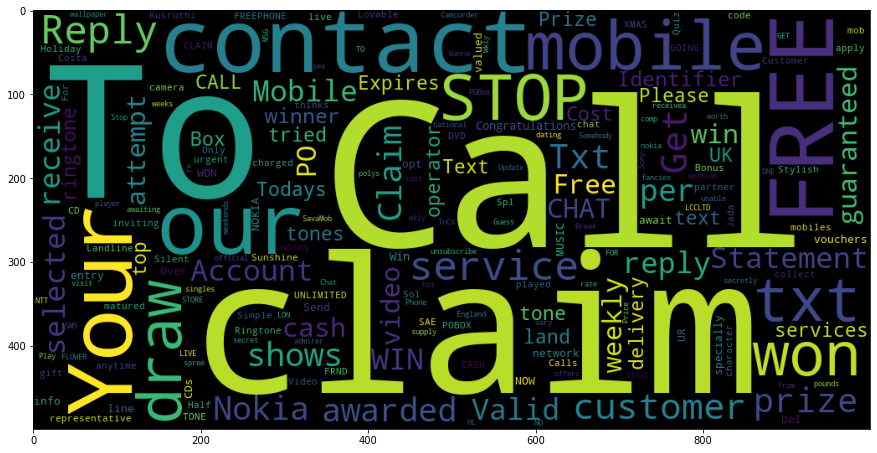

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(spam_dic_pure)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

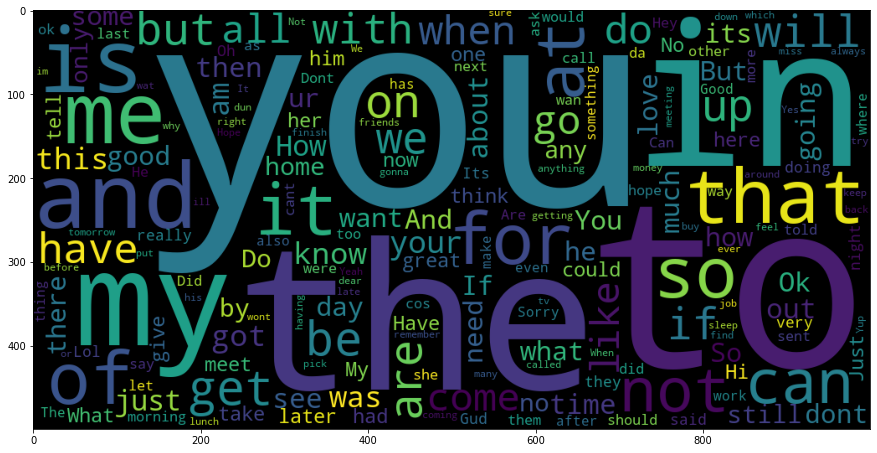

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(ham_dic_pure)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)